# Image Processing in Python

@author Annice<br>
BMEN 207 <br>
Date: Oct 28 2021<br>
Fall 2021

-------------------------------------------------------------------------------------

<h2>Introduction to Image Processing (Project II)</h2>

<h3>How to Read an Image</h3>

In [10]:
#import relevant modules
from skimage import io
from matplotlib import pyplot as plt

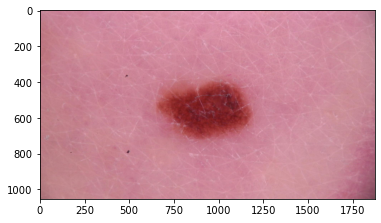

In [12]:
#Read an image
data_dir = "melanoma_data"
img = io.imread(f"{data_dir}/img_2.jpg")
plt.imshow(img)

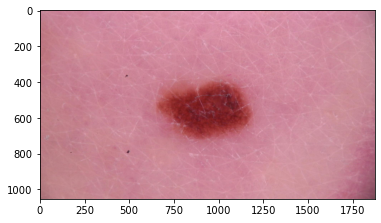

In [13]:
plt.imshow(img[::1])

<h3>Read Multiple Images</h3>

<Figure size 432x288 with 0 Axes>

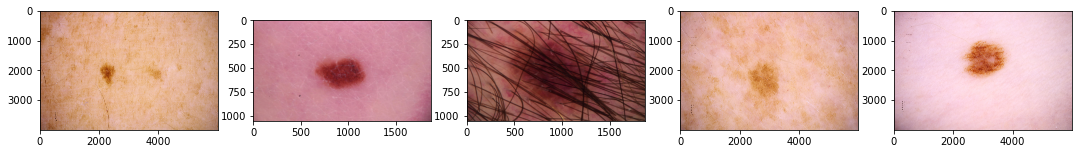

In [14]:
plt.figure()
fig, img_holder = plt.subplots(1, 5) 
fig.set_size_inches(18.5, 10.5)
#15-18 range
for i in range(1, 6):
    hold_img = io.imread(f"{data_dir}/img_{i}.jpg")
    img_holder[i-1].imshow(hold_img)

<h3>Transform into Grayscale</h3>

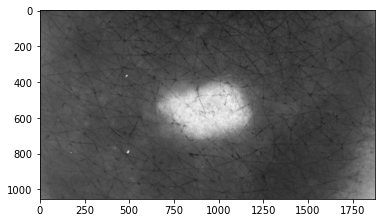

In [4]:
#Read an image in grayscale
from skimage.color import rgb2gray
gray_scale_img = rgb2gray(img)
plt.imshow(gray_scale_img, plt.cm.binary)

In [5]:
gray_scale_img.shape

(1053, 1872)

<h3>Alternatively Read Image as Grayscale</h3>

In [6]:
gray_scale_img = io.imread(f"{data_dir}/img_2.jpg", as_gray=True)

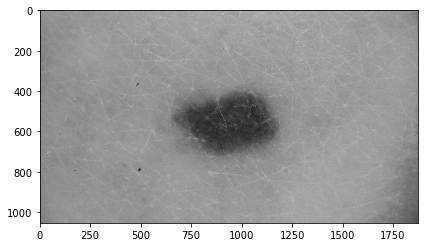

In [7]:
io.imshow(gray_scale_img)

<h3>Scale</h3>

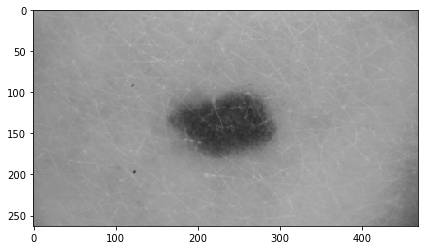

In [149]:
from skimage.transform import rescale, resize
img_rescaled = rescale(img, 0.25)
img_rescaled.shape
io.imshow(img_rescaled)

In [150]:
img_resized = resize(img, (100, 100))
img_resized.shape

(100, 100, 3)

<h3>Histogram</h3>

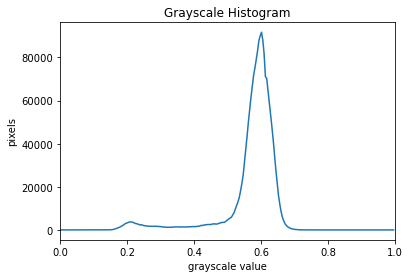

257
256


In [151]:
import numpy as np
from matplotlib import pyplot as plt

# create the histogram
histogram, bin_edges = np.histogram(gray_scale_img, bins=256, range=(0, 1))
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()
print(len(bin_edges))
print(len(histogram))

<h3>Blob Analysis</h3>

<Figure size 432x288 with 0 Axes>

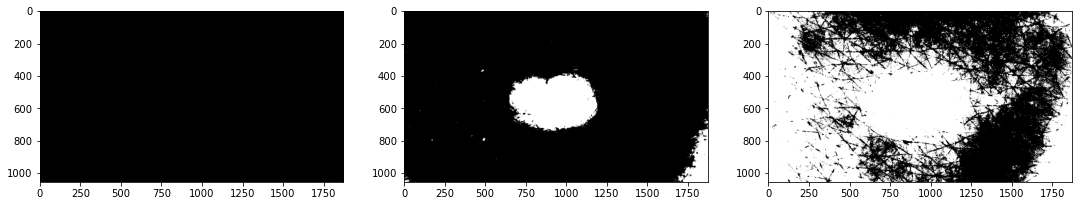

In [8]:
plt.figure()
lst = [0.1, 0.5, 0.6]
fig, img_holder = plt.subplots(1,len(lst))
fig.set_size_inches(18.5, 10.5)
j=0
for i in lst:
    img_binary = gray_scale_img <i
    img_holder[j].imshow(img_binary, cmap = 'gray')
    j+=1

In [14]:
binary = gray_scale_img <0.5

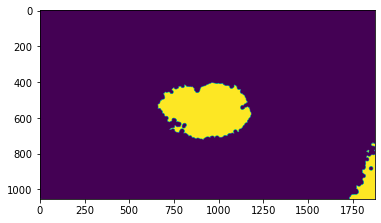

In [19]:
from skimage.morphology import erosion
from skimage.morphology import disk 
selem = disk(10)
eroded_img = erosion(binary, selem)
plt.imshow(eroded_img)

In [20]:
import skimage.morphology as morph

In [51]:
b = morph.remove_small_objects(binary, min_size=1000)

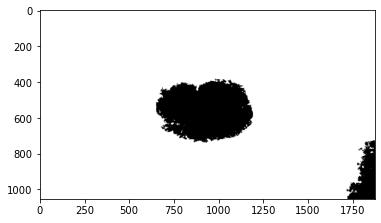

In [52]:
plt.imshow(b, plt.cm.binary)

In [65]:
c = morph.remove_small_holes(b, 1000)

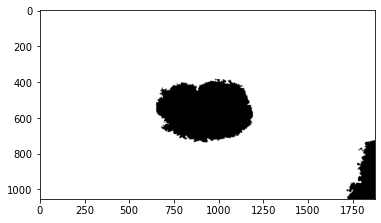

In [66]:
plt.imshow(c, plt.cm.binary)

In [75]:
from skimage import measure
measure.perimeter(c, neighbourhood=4) 

4896.271570324363

In [124]:
img_label = measure.label(c)

In [125]:
regions = measure.regionprops(img_label)

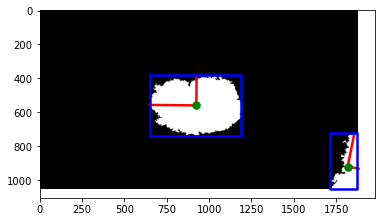

In [126]:
import math as math



fig, ax = plt.subplots()
ax.imshow(c, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)


#ax.axis((0, 600, 600, 0))
plt.show()

In [119]:
measure.regionprops?

In [95]:
region_means = [r.area for r in measure.regionprops(img_label)]


In [98]:
[r.major_axis_length for r in measure.regionprops(img_label)]

[548.3985228829619, 371.65550930531913]

In [120]:
[r.orientation for r in measure.regionprops(img_label)]

[1.5603014326384763, -0.1969558884880049]

In [122]:
new_img_label = measure.label(new_pic)

In [123]:
[r.orientation for r in measure.regionprops(new_img_label)]

[-0.010494894156419897]

In [100]:
from skimage.transform import rotate
region_means

[144552, 30339]

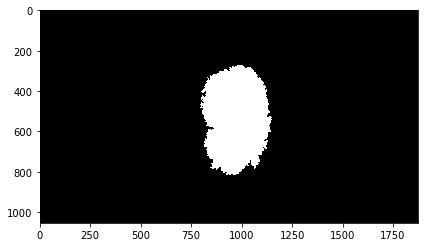

In [102]:

new_pic = rotate(c, 90)

from skimage.io import imshow, show

imshow(new_pic)

In [ ]:
deltaY = P2_y - P1_y
deltaX = P2_x - P1_x


In [135]:
import numpy as np

def TestSymmetry(A, B):
    """Test the symmetry between two images by calculating the intersection/union of pixels"""
    intersection = np.bitwise_and(A,B)

    union = np.bitwise_or(A,B)

    res = np.count_nonzero(intersection)/np.count_nonzero(union)
    return res

# Read image in greyscale and get shape and centres
im = c
h, w = im.shape
ch, cw = h//2, w//2

# Test left-right symmetry
left  = im[:, :cw]
right = im[:, cw:]
LR = TestSymmetry(left, np.flip(right, axis=1))

# Test top-bottom symmetry
top = im[:ch, :]
bot = im[(ch+1):, :]
TB = TestSymmetry(top, np.flip(bot, axis=0))
print(f'{int(LR*100)} {int(TB*100)}')

60 44


In [138]:
ch

526

In [139]:
h

1053

In [128]:
type(new_pic[0][0])

numpy.float64

In [133]:
type(c[0][0])

numpy.bool_

In [130]:
left

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [107]:
right.shape

(1053, 936)

In [108]:
top.shape

(526, 1872)

In [110]:
bot.shape

(527, 1872)

# Diabetic Retinopathy Example (Possible Image Processing Steps)

Description: In this session we look at a dataset containing images of the left and right retina of patients and we learn how to process their images such that they are appropriate for machine learning.
<br>
This sessions objectives are:
<ul>
    <li>Learn to read an image</li>
    <li>Resize an image</li>
    <li>Rescale an image</li>
    </ul>

<img src="diabetic_retinopathy.png" alt="diabet-retino" width="700" height="200">

<h3>Question: I have found my dataset what should I do?!</h3><br> 

<img style = "border-radius: 30%;" src="pandas.jpg" height=200, width=200 alt="pandas">

In [31]:
import pandas as pd
labels_df = pd.read_csv("/Users/annicenajafi/Downloads/trainLabels.csv")

In [32]:
labels_df.head(25)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


In [33]:
labels_df.level.unique()

array([0, 1, 2, 4, 3])

In [34]:
labels_df[['number', 'eye']] = labels_df.image.str.split("_", expand=True)

In [35]:
labels_df

,image,level,number,eye
0,10_left,0,10,left
1,10_right,0,10,right
2,13_left,0,13,left
3,13_right,0,13,right
4,15_left,1,15,left
...,...,...,...,...
35121,44347_right,0,44347,right
35122,44348_left,0,44348,left
35123,44348_right,0,44348,right
35124,44349_left,0,44349,left


In [36]:
labels_df["eye"] = labels_df.eye.map(dict(left=1, right=0))

<h3>Is our dataset balanced?!</h3>

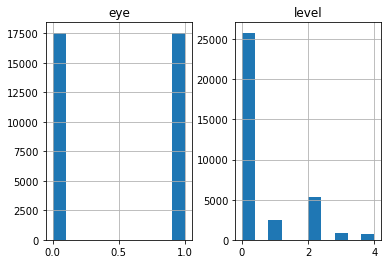

In [37]:
plot = labels_df[['eye', 'level']].hist()

Hmmm... Seems like the majority of the data is related to patients without diabetic retinopathy while those with severe diabetic retinopathy are rare in our dataset

<h3>How to Read an Image</h3>

In [58]:
#import relevant modules
from skimage import io
from matplotlib import pyplot as plt

In [59]:
#Read an image
data_dir = "/Users/annicenajafi/Downloads/resized_train/"
img = io.imread(f"{data_dir}/294_left.jpeg")

<h3>Display Images</h3>

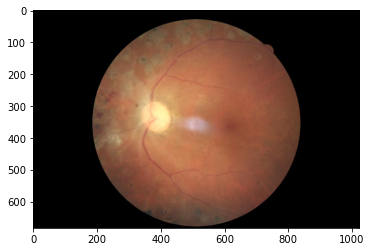

In [60]:
plt.imshow(img)

**Question: What does that 3 mean?**

In [61]:
#Answer here

Let's take a look at the rest of our data

<Figure size 432x288 with 0 Axes>

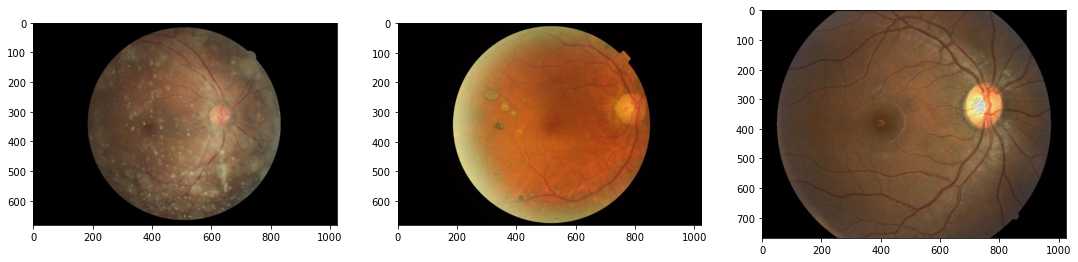

In [62]:
plt.figure()
fig, img_holder = plt.subplots(1,3) 
fig.set_size_inches(18.5, 10.5)
retina = "right"
#15-18 range
for i in range(216, 219):
    hold_img = io.imread(f"{data_dir}/{i}_{retina}.jpeg")
    img_holder[i-216].imshow(hold_img)

**Question: Okay, so non uniform illumination, what can be the problems associated with this when later training our model?!**

In [534]:
#Answer here

<h3>Non Uniform Illumination<br><br>
    <em>Remedy:</em></h3>

<h3>I. Transform into a grayscale</h3>

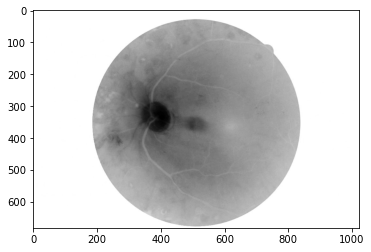

In [63]:
#Read an image in grayscale
from skimage.color import rgb2gray
gray_scale_img = rgb2gray(img)
plt.imshow(gray_scale_img, plt.cm.binary)

<h3>Histogram Equalization</h3>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Histogrammeinebnung.png" height=300; width=300>

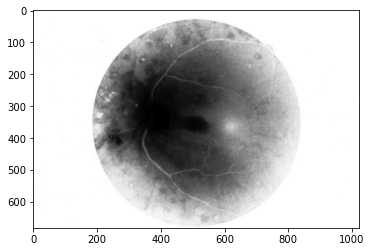

In [64]:
from skimage import exposure
img_eq = exposure.equalize_hist(gray_scale_img)
plt.imshow(img_eq, plt.cm.binary)

<h3>II. Color Isolation</h3>

 **"The first step in analyzing such images (diabetic retinopathy) is thus to compensate for this non-uniform illumination.  The green channel of color fundus images is commonly used and analyzed for illumination correction. This is due to its higher contrast between retinal blood vessels and background whereas the remaining red and blue channels suffer from saturation and dark color respectively."**
 
 Reference:<br>
 https://core.ac.uk/reader/191753025?utm_source=linkout

<h3>RGB - Red, Green, Blue</h3>

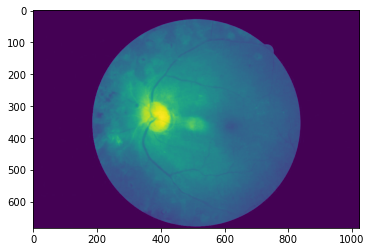

In [91]:
green_channel = img[:,:,1]
plt.imshow(img[:,:,1])

Right but question is how do I know which filter I should use?!

This is where you have to know about histograms to understand it better. Let's take a step back and look at the shape of our original image

In [92]:
img.shape

(683, 1024, 3)

In [6]:
def func():
    return 1, 2, 3

In [8]:
func()[1]

2

This means our image has 683 rows and 1024 columns of pixels and each pixel has three values from 1 to 255 representing the intensity of that color for that particular pixel. 

<h3>Histograms</h3>

Now imagine we go over all pixels and extract the intensity of the pixel over one specific channel then count the numebr of pixels with value equal to 0, then 1 and 2 and 3 and so on until we get to 255, we can plot a histogram of these values. 

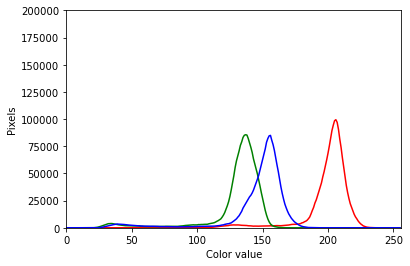

In [140]:
import sys
import skimage.io
from matplotlib import pyplot as plt
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
plt.ylim([0, 200000])

for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(img[:, :, channel_id], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=c)
    
plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()
    

<h3>Shading Differences Across Images</h3>

<h3>Next Step: Correct for shading</h3>
<br>
<h3><em>Remedy:</em></h3>

**"Background estimation and subtraction methods are the most commonly used techniques to correct shading effects"**

<h3>Background Estimation and Subtraction</h3>

**"In this method uses the green channel of the image to estimate the “background” image using a ```large median filter``` of size 25×25 and subtract it from the green channel resulting in the shade corrected image."**

In [94]:
from scipy import ndimage
processed_green_img = ndimage.median_filter(green_channel, size=25)
processed_green_img = green_channel - processed_green_img

In [95]:
processed_green_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 0, ..., 2, 2, 1]], dtype=uint8)

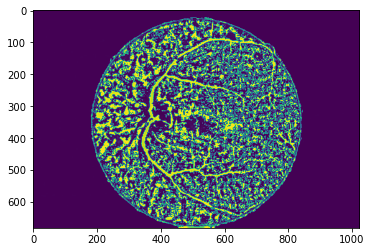

In [96]:
plt.imshow(processed_green_img)

<h3>Erosion</h3>

Use erosion to get rid of the ring around image as well as small bright regions (maybe noise but what if microaneurysm?!). Because erosion finds the minimum of the pixel values around every pixel and replaces that pixel with that specific value.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Grayscale_Morphological_Erosion.gif" height=400, width=400; alt="erosion">

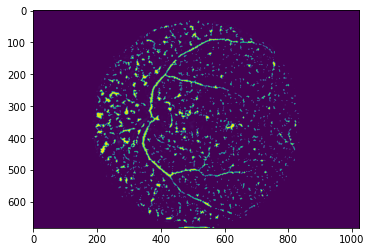

In [99]:
from skimage.morphology import erosion
from skimage.morphology import disk 
selem = disk(2)
eroded_img = erosion(processed_green_img, selem)
plt.imshow(eroded_img)

<h3>Top Hat Transformation</h3>

Papers using white top hat filters for detecting either microaneurysm or enhancing the detection of diabetic retinopathy using this dataset:
    <ul>
    <li>https://iopscience.iop.org/article/10.1088/1742-6596/1997/1/012002/pdf</li>
    </ul>

White top hat transform is used to highlight smaller lighter objects (Aneurysms or maybe hemorrhages) in your image but what about small vessels?! Black top hat does the opposite...

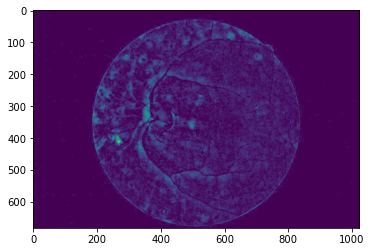

In [110]:
from skimage.morphology import white_tophat
from skimage.morphology import disk

selem = disk(15)
processed_img = white_tophat(green_channel, selem)
plt.imshow(processed_img)


<h3>Blob Analysis</h3>

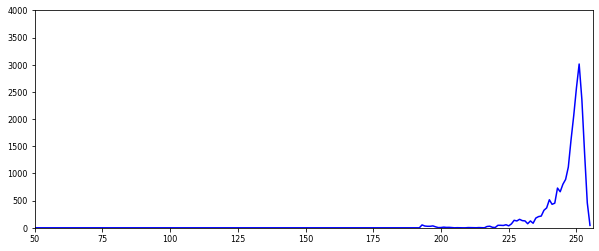

In [553]:
# specifying figure size
fig = plt.figure(figsize=(10, 4))
# each color
plt.xlim([50, 256])
plt.ylim([0, 4000])
histogram, bin_edges = np.histogram(processed_img, bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram, color=c)


<Figure size 432x288 with 0 Axes>

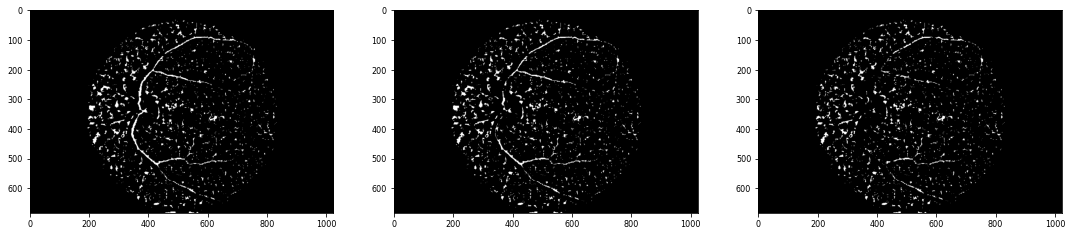

In [546]:
#img_binary = processed_img >200
#plt.imshow(img_binary, cmap = 'gray')

plt.figure()
fig, img_holder = plt.subplots(1,3) 
fig.set_size_inches(18.5, 10.5)
lst = [200, 230, 240]
j=0
for i in lst:
    img_binary = processed_img >i
    img_holder[j].imshow(img_binary, cmap = 'gray')
    j+=1

<h3>Is Blob analysis really helpful here?! Which of these image processing steps helps with the final result and which one doesn't?!</h3>

Note: These image processing steps may or may not help with improving the accuracy of the machine learning model trained on them. They are given here so that you have an idea of how to get started on your project if you are building a machine learning model...

<h3>Apply Image Processing To All Images in Your Dataset</h3>

In [105]:
'''
def process_image(data_path, save_path):
    hold_img = io.imread(data_path)
    green_channel = hold_img[:,:,1]
    processed_green_img = ndimage.median_filter(green_channel, size=25)
    processed_green_img = green_channel - processed_green_img
    plt.imshow(processed_green_img, cmap = 'gray')
    plt.savefig(save_path)

save_dir = "/Users/annicenajafi/Desktop/processed_images"
for file_name in labels_df['image'][1:30:1]:
    path = f"{data_dir}/{file_name}.jpeg"
    process_image(path, f"{save_dir}/{file_name}.jpeg")
'''

'\ndef process_image(data_path, save_path):\n    hold_img = io.imread(data_path)\n    green_channel = hold_img[:,:,1]\n    processed_green_img = ndimage.median_filter(green_channel, size=25)\n    processed_green_img = green_channel - processed_green_img\n    plt.imshow(processed_green_img, cmap = \'gray\')\n    plt.savefig(save_path)\n\nsave_dir = "/Users/annicenajafi/Desktop/processed_images"\nfor file_name in labels_df[\'image\'][1:30:1]:\n    path = f"{data_dir}/{file_name}.jpeg"\n    process_image(path, f"{save_dir}/{file_name}.jpeg")\n'

<img src="https://i.redd.it/dpud8kydrkp61.png" height=400; width=400; alt="dog">

Texas A&M University, College Station, TX <br>
Fall 2021 <br>
**==<br>
<a href="mailto:annicenajafi@tamu.edu">Email me with questions!</a> :))